In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
from pandas.plotting import register_matplotlib_converters

data=pd.read_excel("D:\\stock_data\\mapping_merge.xlsx")
data

,Globle_ID,DOCUMENT_ID,DOCUMENT_TYPE,FILING_DATE,MODIFIED_AT,DETAIL_JSONcompany_name,DETAIL_JSONparsing_status,avg_sent_x,sum_sent_x,hit_count_x,...,TRADINGITEMSTATUSNAME,COMPANYNAME,SECURITYNAME,EXCHANGENAME,EXCHANGEIMPORTANCE,SECTOR,SIMPLEINDUSTRYDESCRIPTION,REGION,GMRF_Mapping_COUNTRY,ISIN
0,5417481,163996578,AR,2021-07-30,2021-08-02 15:07:00,Kazakhstan Electricity Grid Operating Company JSC,WARNING,0.407153,31.757929,4742,...,Active,Kazakhstan Electricity Grid Operating Company JSC,Ordinary Shares,Kazakhstan Stock Exchange,742.0,Utilities,Electric Utilities,Asia / Pacific,Kazakhstan,KZ1C00000959
1,5480761,164612143,AR,2021-08-10,2021-08-13 06:25:00,Kcell Joint Stock Company,WARNING,0.564292,53.607734,3841,...,Active,Kcell Joint Stock Company,Common Shares,Kazakhstan Stock Exchange,742.0,Communication Services,Wireless Telecommunication Services,Asia / Pacific,Kazakhstan,KZ1C00000876
2,6515698,35612471,AR,2017-06-10,2021-09-12 16:37:00,"""Nurbank"" Joint Stock Company",WARNING,-0.083663,-3.430163,2106,...,Inactive,Nurbank Joint Stock Company,Common Shares,Kazakhstan Stock Exchange,742.0,Financials,Banks,Asia / Pacific,Kazakhstan,KZ000A1CTMU5
3,2518144,117019778,AR,2019-05-30,2021-10-04 00:00:00,Kcell Joint Stock Company,WARNING,3.584056,39.424617,3391,...,Active,Kcell Joint Stock Company,Common Shares,Kazakhstan Stock Exchange,742.0,Communication Services,Wireless Telecommunication Services,Asia / Pacific,Kazakhstan,KZ1C00000876
4,2521306,116754699,AR,2019-05-30,2021-10-04 00:00:00,KazTransOil JSC,WARNING,0.071949,9.137533,7888,...,Active,KazTransOil JSC,Common Shares,Kazakhstan Stock Exchange,742.0,Energy,"Oil, Gas and Consumable Fuels",Asia / Pacific,Kazakhstan,KZ1C00000744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82271,8882908,193753763,AR,2022-10-11,2022-10-12 08:29:00,EcoCash Holdings Zimbabwe Limited,WARNING,0.730089,49.646083,4144,...,Active,EcoCash Holdings Zimbabwe Limited,Ordinary Shares,Zimbabwe Stock Exchange,1469.0,Financials,Diversified Financial Services,Africa / Middle East,Zimbabwe,ZW0009012437
82272,8882908,193753763,AR,2022-10-11,2022-10-12 08:29:00,EcoCash Holdings Zimbabwe Limited,WARNING,0.730089,49.646083,4144,...,Active,EcoCash Holdings Zimbabwe Limited,Ordinary Shares,Zimbabwe Stock Exchange,1469.0,Financials,Diversified Financial Services,Africa / Middle East,Zimbabwe,ZW0009012361
82273,8985994,194780722,AR,2022-10-29,2022-11-08 05:43:00,Simbisa Brands Limited,WARNING,0.579950,37.116818,2991,...,Active,Simbisa Brands Limited,Ordinary Shares,Zimbabwe Stock Exchange,1469.0,Consumer Discretionary\t,"Hotels, Restaurants and Leisure",Africa / Middle East,Zimbabwe,ZW0009012262
82274,9156117,197325825,AR,2022-12-21,2022-12-21 16:00:00,CAFCA Limited,SUCCESS,0.124659,4.363052,1485,...,Active,CAFCA Limited,Ordinary Shares,The Johannesburg Securities Exchange,1187.0,Industrials,Electrical Equipment,Africa / Middle East,Zimbabwe,ZW0009011942


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


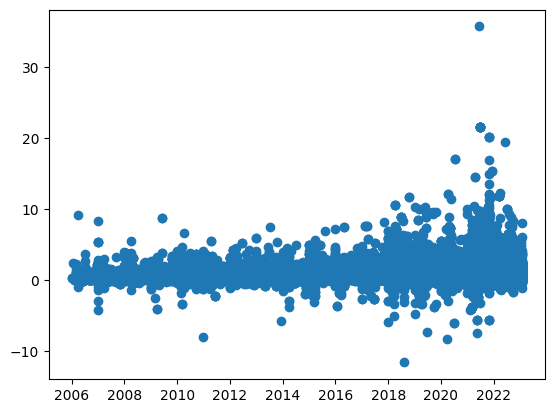

In [2]:
para="avg_sent_x"


data=data.sort_values("FILING_DATE")
x=data["FILING_DATE"]
y=data[para]
print(type(x[1]))
plt.scatter(x,y)

In [3]:
data1=data.set_index("FILING_DATE",drop=False)
data1
grouped=data1.groupby(data1.index.to_period(freq='m'))
# data.\
# grouped.size()
group1=grouped[para].mean()
group1=group1.reset_index()


In [4]:
start_day1="2005-01-01"
end_day1="2020-01-01"
start_day2="2020-01-01"
end_day2="2023-02-28"
data_p1=group1[(group1['FILING_DATE']>=start_day1 )&(group1['FILING_DATE']<end_day1 )]
data_p2=group1[(group1['FILING_DATE']>=start_day2 )&(group1['FILING_DATE']<=end_day2 )]
data_p2
# for i in range(len(data_p1))
list1=np.zeros(len(data_p1))
list2=np.ones(len(data_p2))
dummy=np.concatenate((list1,list2))

dummy=pd.DataFrame(dummy,columns=["dummy"])
# dummy.rename(index={'dummy':'aa'},inplace=True)

# list1
dummy

# len(data_p1['FILING_DATE'])

,dummy
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
202,1.0
203,1.0
204,1.0
205,1.0


    FILING_DATE  dummy
0    2005-12-01    0.0
1    2006-01-01    0.0
2    2006-02-01    0.0
3    2006-03-01    0.0
4    2006-04-01    0.0
..          ...    ...
202  2022-10-01    1.0
203  2022-11-01    1.0
204  2022-12-01    1.0
205  2023-01-01    1.0
206  2023-02-01    1.0

[207 rows x 2 columns]


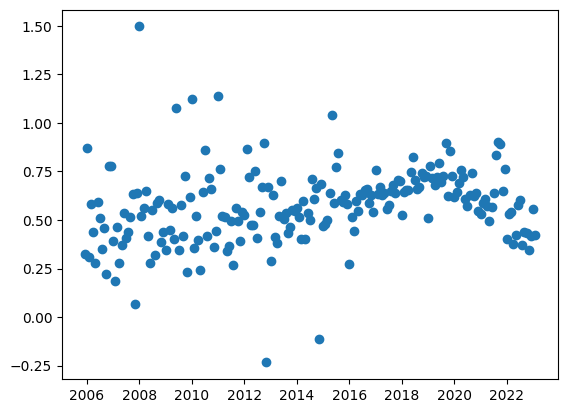

In [22]:
group1
# grouped.size()
x1=group1["FILING_DATE"].astype(str)
x1=pd.to_datetime(x1)

y1=group1[para]

new_x=pd.concat([x1,dummy],axis=1)
# new_y1=y1.append(dummy)
print(new_x)
# type(x1[1])
plt.scatter(x1,y1)
# x1

In [25]:
# type(x1)
# x_d=x1.diff(1)
# x1
x_d=pd.Series(range(len(x1)))
# type(x_d)
x_a=x_d.values
y_a=y1.values
type(y_a)

numpy.ndarray

In [7]:
x_d1=x_d.values.reshape(len(x_d),1)
# new_y1.shape
# np.reshape(x_d,(len(x_d),1))
x_d1.shape

(207, 1)

In [24]:

model=LinearRegression()
# slope1, intercept1, r_value,p_value,stderr= model(
model.fit(x_a,y_a)

# text=[]
# text.append("{0:}={1:.2f}{2:}{3:+.2f}".format(ticker_B,slope,ticker_A,intercept))
# textbox(text,"regress_formula")

ValueError: Expected 2D array, got 1D array instead:
array=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print("slope: "+str(slope1))
print("intercept: "+str(intercept1))
print("r_value:"+str(r_value))
print("p_value:"+str(p_value))
print("stderror:"+str(stderr))
residual1=y1-(intercept1+x_d*slope1)
residual1.name="residual1"
print(residual1.head())


In [ ]:
## SSE
residual1_square=residual1*residual1
SSE=residual1_square.sum()
print("SSE= ",SSE)
## SST


SSE=  7.46713329796906


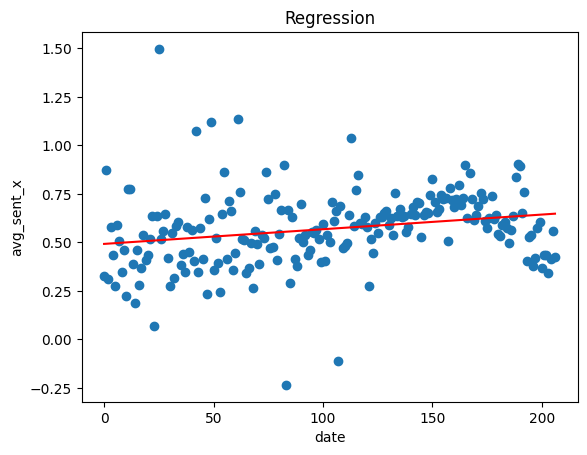

In [ ]:
plt.scatter(x_d,y1,label="prices")
plt.plot(x_d,intercept1+x_d*slope1,color="red",label="regression")
plt.xlabel("date")
plt.ylabel(para)
plt.title("Regression")
# legend("bottom")
# saver("regression")
plt.show()
plt.close()

## Analyze residual and noise

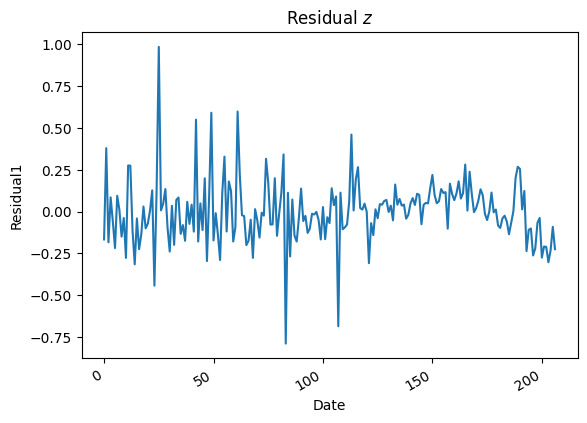

In [ ]:
plt.figure()
plt.plot(residual1.index,residual1,label="signal")
plt.ylabel("Residual1")
plt.xlabel("Date")
plt.title(r"Residual $z$")
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

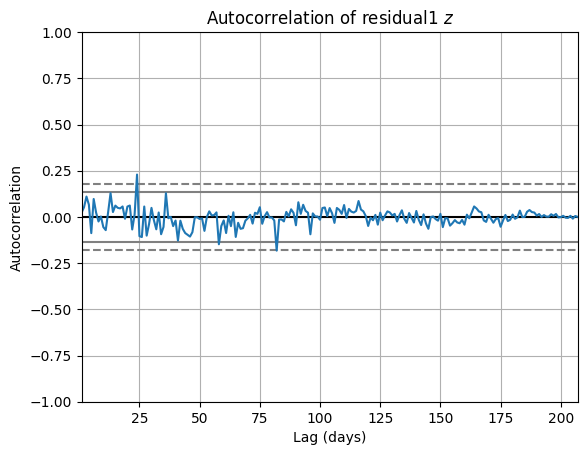

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(residual1)
plt.title(r"Autocorrelation of residual1 $z$")
plt.xlabel("Lag (days)")
plt.show()
plt.close()

In [ ]:
residual1_lagged=residual1.shift(periods=1)
residual1_lagged.name="residual1_lagged"
DF=pd.concat([residual1,residual1_lagged],axis=1)
print(DF.head())
DF=DF.dropna(axis="index")
print(DF.head())

   residual1  residual1_lagged
0  -0.166215               NaN
1   0.379661         -0.166215
2  -0.183591          0.379661
3   0.085255         -0.183591
4  -0.059091          0.085255
   residual1  residual1_lagged
1   0.379661         -0.166215
2  -0.183591          0.379661
3   0.085255         -0.183591
4  -0.059091          0.085255
5  -0.218085         -0.059091


In [ ]:
slope_R, intercept_R, _, _, _ = scipy.stats.linregress(
    DF["residual1_lagged"],DF["residual1"])
print("AR slope: "+str(slope_R))
print("AR intercept: "+str(intercept_R))
noise1=DF["residual1"]-(intercept_R+DF["residual1_lagged"]*slope_R)
noise1_std=np.std(noise1)
noise1_normalized=noise1/noise1_std
print("noise1 mean",np.mean(noise1))
print("noise1 std: ",noise1_std)

AR slope: 0.023628614207186184
AR intercept: 0.0007810918264627991
noise1 mean 3.772602510862182e-18
noise1 std:  0.18998251007570147


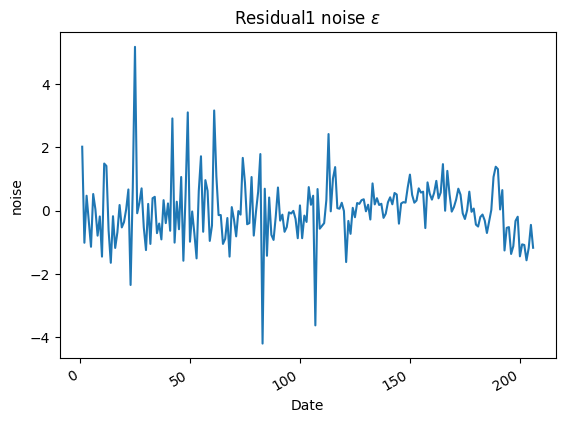

In [ ]:
plt.figure()
plt.plot(noise1_normalized.index,noise1_normalized,label="dW")
plt.ylabel("noise")
plt.xlabel("Date")
plt.title(r"Residual1 noise $\varepsilon$")
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

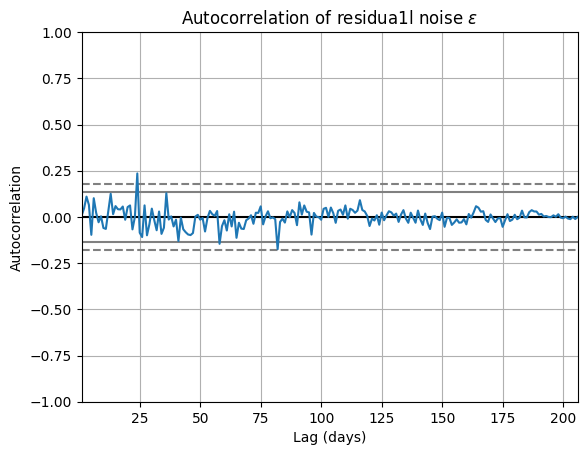

In [ ]:
plt.figure()
autocorrelation_plot(noise1_normalized)
plt.title(r"Autocorrelation of residua1l noise $\varepsilon$")
plt.xlabel("Lag (days)")
plt.show()
plt.close()

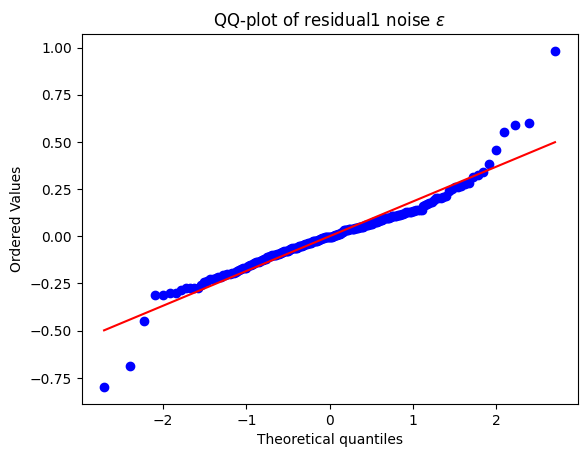

In [ ]:
scipy.stats.probplot(noise1.values, dist="norm", plot=plt)
plt.title(r"QQ-plot of residual1 noise $\varepsilon$")
plt.show()
plt.close()

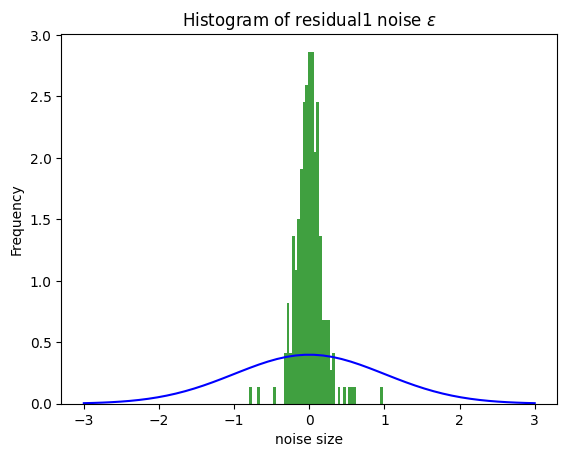

In [ ]:
xvals=np.linspace(start=-3,stop=3)
fvals=scipy.stats.norm.pdf(xvals)
plt.figure()
plt.hist(noise1, 50, facecolor='green', alpha=0.75,density=True,label="empirical")
plt.plot(xvals,fvals,label="standard Gaussian",color="blue")
plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title(r"Histogram of residual1 noise $\varepsilon$")

plt.show()
plt.close()